# UTSA CS 3793/5233: Assignment-3

**Roberts - Clay - (gbi069)**






## Learning Objectives

Implement 2 different machine learning algorithms
*   Stochastic Gradient Descent
*   ID3 Decision Tree



## Description

This assignment is focused on **machine learning**, mainly on the implementation of 2 different algorithms - Stochastic Gradient Descent & ID3 decision tree.
The assignment is divided into two sections, each for one unique ML algorithm.

The base structure and comments are provided on what should be done. You can use some libraries that help support you for the successful completion of the assignment. However, you **CANNOT** use a complete library that contains the implementation of ML algorithms. You can get pieces of code from online, but please cite the source properly.


##Import Libraries

Write all the import statements here. This should be for both algorithm implmentations. As mentioned before, you can not use any premade ML libraries.

In [ ]:
# import all required libraries
from google.colab import drive
import pandas as pd
import numpy as np
from numpy import dot
import math
%matplotlib inline
import matplotlib.pyplot as plt
from copy import deepcopy
import json

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Assume that the data files are in the following folder -- THIS WILL BE USED BY THE TA
basePath = "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/"
!ls "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/"

cities.csv     gd-test.dat   id3-test.dat   texas-map.png
distances.csv  gd-train.dat  id3-train.dat


#Stochastic Gradient Descent

In this section, you will implement the Stochastic Gradient Descent algorithm. The training is for a **binary classification** task i.e. each instance will have a class value of 0 or 1. Also, assume that you are given **all binary-valued attributes** and that there are **no missing values** in the train or test data.


##Algorithm

(40 points)

Following are the data files that will be provided to you for the gradient descent algorithm implementation.

*   Training file - 'gd-train.dat'
*   Testing file - 'gd-test.dat'

In these files, only non-space characters are relevant. The first line contains the attribute names. All the other lines are different example instances to be used for the algorithm. Each column holds values of the attributes, whereas the last column holds the class label for that instance.

Write the code in the following code block, structure is provided. Instructions on the steps to follow are provided as comments.



In [352]:
# Data file name variables
training_file = str(basePath) + "gd-train.dat"
testing_file = str(basePath) + "gd-test.dat"

In [353]:
# Read the training and testing data files
train_data = pd.read_table(training_file)
test_data = pd.read_table(testing_file)
print(train_data.head())
print()
print(test_data.head())
train_data

   A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  A11  A12  A13  C
0   1   1   1   1   0   0   1   1   0    0    0    1    1  0
1   0   0   0   1   0   0   1   1   0    1    0    0    1  0
2   0   1   1   1   0   1   1   1   1    0    0    0    1  0
3   0   1   1   0   1   0   1   1   1    0    1    0    1  0
4   0   1   0   0   0   1   0   1   0    1    0    0    1  0

   A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  A11  A12  A13  C
0   1   1   0   0   0   0   0   0   1    1    0    0    1  0
1   0   0   1   1   0   1   1   0   0    0    0    0    1  0
2   0   1   0   1   1   0   1   0   1    1    1    0    1  1
3   0   0   1   0   0   1   0   1   0    1    1    1    1  0
4   0   1   0   0   0   0   0   1   1    1    1    1    1  0


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,C
0,1,1,1,1,0,0,1,1,0,0,0,1,1,0
1,0,0,0,1,0,0,1,1,0,1,0,0,1,0
2,0,1,1,1,0,1,1,1,1,0,0,0,1,0
3,0,1,1,0,1,0,1,1,1,0,1,0,1,0
4,0,1,0,0,0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,1,0,1,0,1,1,0,0,1,1,0,1,0
96,1,0,0,1,0,0,0,1,1,0,1,1,1,0
97,1,1,1,0,1,1,1,0,0,0,1,0,1,0
98,1,1,1,1,0,0,0,1,1,1,1,1,1,0


In [354]:
# Activation Function - implement Sigmoid
def activation_function(h):
    # given 'h' compute and return 'z' based on the activation function implemented
  return 1 /(1 + np.exp(-h))

In [355]:
# Train the model using the given training dataset and the learning rate
# return the "weights" learnt for the perceptron - include the weight assocaited with bias as the last entry
def train(train_data, learning_rate=0.05):
  x_data = train_data.iloc[:, :-1]
  y_data = train_data.iloc[:, -1]
  w = np.zeros_like(x_data.iloc[0], dtype=float)
  # print(x_data.head())
  for i in range(len(x_data)):
    row = x_data.iloc[i].array
    h = np.dot(row, w)
    z = activation_function(h)

    for j in range(len(w)):
      w[j] = w[j] + learning_rate * (y_data[i] - z) * row[j]

  return w
    # initialize weights to 0
    # go through each training data instance
        # get 'x' as one multi-variate data instance and 'y' as the ground truth class label
        # obtain h(x)
        # call the activation function with 'h' as parameter to obtain 'z'
        # update all weights individually using learning_rate, (y-z), and the corresponding 'x'
    # return the final learnt weights


In [356]:
# Test the model (weights learnt) using the given test dataset
# return the accuracy value
def test(test_data, weights, threshold):
  x_data = test_data.iloc[:, :-1]
  y_data = test_data.iloc[:, -1]
  run_err = 0

  for i in range(len(x_data)):
    row = x_data.iloc[i].array
    h = np.dot(row, weights)
    z = activation_function(h)
    if (z >= threshold):
      z = 1
    else:
      z = 0
    # err = (1/2)*(z - y_data[i])**2
    # run_err += err
    if(z == y_data[i]): run_err += 1

  tot_err = (run_err / len(x_data)) * 100

  return tot_err

    # go through each testing data instance
        # get 'x' as one multi-variate data instance and 'y' as the ground truth class label
        # obtain h(x)
        # call the activation function with 'h' as parameter to obtain 'z'
        # use 'threshold' to convert 'z' to either 0 or 1 so as to match to the ground truth binary labels
        # compare the thresholded 'z' with 'y' to calculate the positive and negative instances for calculating accuracy
    # return the accuracy value for the given test dataset


In [357]:
# Gradient Descent function
def gradient_descent(df_train, df_test, learning_rate=0.05, threshold=0.5):
    # call the train function to train the model and obtain the weights
    weights = train(df_train, learning_rate)
    # call the test function with the training dataset to obtain the training accuracy
    trainAccuracy = test(df_train, weights, threshold)
    # call the test function with the testing dataset to obtain the testing accuracy
    testAccuracy = test(df_test, weights, threshold)
    return (trainAccuracy, testAccuracy)


In [358]:
# Threshold of 0.5 will be used to classify the instance for the test. If the value is >= 0.5, classify as 1 or else 0.
threshold = 0.5

In [359]:
# Main algorithm loop
# Loop through all the different learning rates [0.05, 1]
rates = range(5, 105, 5)
rates = [rate/100 for rate in rates]
acc = []

for rate in rates:
  values = gradient_descent(train_data, test_data, rate, threshold)
  tmp = [rate, values[0], values[1]]
  acc.append(tmp)
  print(f"Accuracy for LR of {rate} on Training set = {values[0]} %")
  print(f"Accuracy for LR of {rate} on Testing set = {values[1]} %")
    # For each learning rate selected, call the gradient descent function to obtain the train and test accuracy values
    # Print both the accuracy values as "Accuracy for LR of 0.1 on Training set = x %" OR "Accuracy for LR of 0.1 on Testing set = x %"


Accuracy for LR of 0.05 on Training set = 68.0 %
Accuracy for LR of 0.05 on Testing set = 72.25 %
Accuracy for LR of 0.1 on Training set = 68.0 %
Accuracy for LR of 0.1 on Testing set = 71.75 %
Accuracy for LR of 0.15 on Training set = 69.0 %
Accuracy for LR of 0.15 on Testing set = 71.75 %
Accuracy for LR of 0.2 on Training set = 69.0 %
Accuracy for LR of 0.2 on Testing set = 71.5 %
Accuracy for LR of 0.25 on Training set = 69.0 %
Accuracy for LR of 0.25 on Testing set = 71.0 %
Accuracy for LR of 0.3 on Training set = 69.0 %
Accuracy for LR of 0.3 on Testing set = 70.75 %
Accuracy for LR of 0.35 on Training set = 70.0 %
Accuracy for LR of 0.35 on Testing set = 70.0 %
Accuracy for LR of 0.4 on Training set = 70.0 %
Accuracy for LR of 0.4 on Testing set = 69.0 %
Accuracy for LR of 0.45 on Training set = 69.0 %
Accuracy for LR of 0.45 on Testing set = 68.5 %
Accuracy for LR of 0.5 on Training set = 69.0 %
Accuracy for LR of 0.5 on Testing set = 68.25 %
Accuracy for LR of 0.55 on Training

##Extra Credit - Accuracy Plots

(05 points)

Use the above accuracy results on the training and testing data and write code to plot the graphs as mentioned in the code block below.



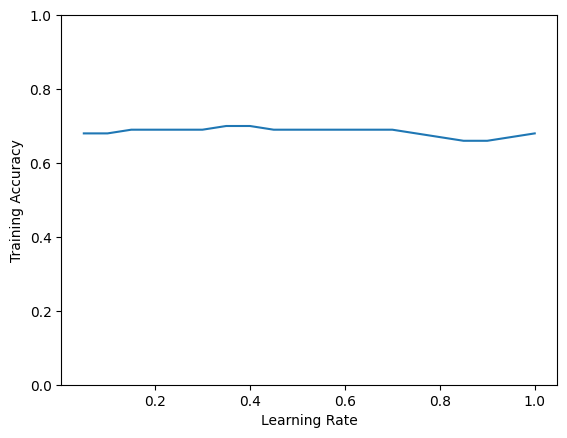

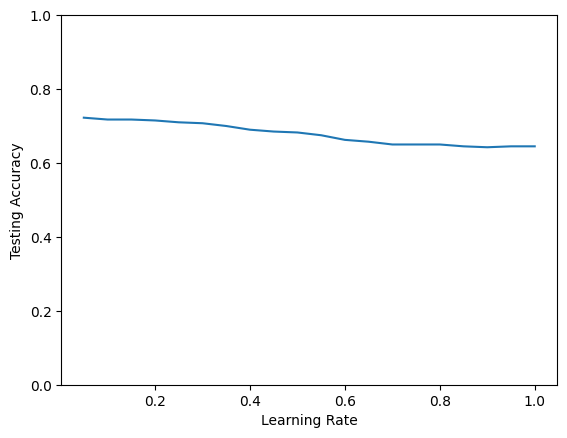

In [360]:
# Plot the graphs for accuracy results.
# There will be 2 graphs - one for training data and the other for testing data
# For each graph,
    # X-axis will be the learning rate going from 0.05-1 in increments on 0.05
    # Y-axis will be the accuracy values at the selected learning rate.

learn_val = []
train_val = []
test_val = []
for rate, train_item, test_item in acc:
  learn_val.append(rate)
  train_val.append(train_item/100)
  test_val.append(test_item/100)

plt.plot(learn_val, train_val)
plt.ylim(0.0, 1.0)

# naming the x axis
plt.xlabel('Learning Rate')
# naming the y axis
plt.ylabel('Training Accuracy')

# function to show the plot
plt.show()

plt.plot(learn_val, test_val)
plt.ylim(0.0, 1.0)
# naming the x axis
plt.xlabel('Learning Rate')
# naming the y axis
plt.ylabel('Testing Accuracy')

# function to show the plot
plt.show()

#ID3 Decision Tree

In this section, you will implement the ID3 Decision Tree algorithm. The training is for a **binary classification** task i.e. each instance will have a class value of 0 or 1. Also, assume that there are **no missing values** in the train or test data.


## Algorithm

(85 points)

Following are the data files that will be provided to you for the ID3 algorithm implementation.

*   Training file - 'id3-train.dat'
*   Testing file - 'id3-test.dat'

In these files, only non-space characters are relevant. The first line contains the attribute names. All the other lines are example instances to be used for the algorithm. Each column holds values of the attributes, whereas the last column holds the class label for that instance.

In a decision tree, if you reach a leaf node but still have examples that belong to different classes, then choose the most frequent class (among the instances at the leaf node). If you reach a leaf node in the decision tree and have no examples left or the examples are equally split among multiple classes, then choose the class that is most frequent in the entire training set. You do not need to implement pruning. Also, don’t forget to use logarithm base 2 when computing entropy and set (0 log 0) to 0.

Write the code in the following code block, structure is provided. Instructions on the steps to follow are provided as comments. The code should output the following 3 things:

*   Print the Decision Tree created, in the following example format:

    ```
    attr1 = 0 :
        attr2 = 0 :
            attr3 = 0 : 1 -- 4
            attr3 = 1 : 0 -- 9
        attr2 = 1 :
            attr4 = 0 : 0 -- 2
            attr4 = 1 : 1 -- 10
    attr1 = 1 :
        attr2 = 1 : 1 -- 17

    ```

*   Accuracy on the Training data = x %
*   Accuracy on the Test data = x %





In [361]:
# Data file name variables
train_file = basePath + "id3-train.dat"
test_file = basePath + "id3-test.dat"

In [362]:
train_data = pd.read_table(train_file)
test_data = pd.read_table(test_file)
print(train_data.head())
print()
print(test_data.head())
train_data

   attr1  attr2  attr3  attr4  attr5  attr6  class
0      1      1      0      0      0      0      0
1      0      0      1      1      0      1      0
2      0      1      0      1      1      0      0
3      0      0      1      0      0      1      1
4      0      1      0      0      0      0      0

   attr1  attr2  attr3  attr4  attr5  attr6  class
0      1      1      1      1      0      0      0
1      0      0      0      1      0      0      0
2      0      1      1      1      0      1      1
3      0      1      1      0      1      0      1
4      0      1      0      0      0      1      0


,attr1,attr2,attr3,attr4,attr5,attr6,class
0,1,1,0,0,0,0,0
1,0,0,1,1,0,1,0
2,0,1,0,1,1,0,0
3,0,0,1,0,0,1,1
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
795,1,0,0,0,0,1,0
796,1,0,0,1,0,0,0
797,0,0,0,1,1,0,1
798,0,1,1,1,0,1,1


used https://medium.com/geekculture/step-by-step-decision-tree-id3-algorithm-from-scratch-in-python-no-fancy-library-4822bbfdd88f to get an idea of how to build algorithm, although mine differs significantly



In [363]:
# Calculates entropy for class, or total entropy
def calc_total_entropy(data):
  data_num = len(data['class'])
  class_zero = data['class'].tolist()
  num_zero = [item for item in class_zero if (item == 0)]
  num_zero = len(num_zero)
  num_one = data_num - num_zero

  H = (-(num_zero / data_num) * np.log2(num_zero / data_num)) + (-(num_one / data_num) * np.log2(num_one / data_num))

  return H

# Calculates entropy of the attributes. Since there are two states for each attr, 1 or 0, it returns the entropy of each of those labels
def calc_entropy(data, label):
  data_num = len(data[label])
  check_zero = data[label].tolist()
  num_zero = [item for item in check_zero if item == 0]
  num_zero = len(num_zero)
  num_one = data_num - num_zero

  count_zero_zero = 0
  count_zero_one = 0
  count_one_zero = 0
  count_one_one = 0

  for i, row in data.iterrows():
    ##
    if data[label][i] == 0:
      if data['class'][i] == 0:
        count_zero_zero += 1
      else:
        count_zero_one += 1
    else:
      if data['class'][i] == 0:
        count_one_zero += 1
      else:
        count_one_one += 1

  np.seterr(divide = 'ignore')
  np.seterr(invalid = 'ignore')

  if num_zero == 0:
    H_label_0 = 0.0
  else:
    H_label_0 = (-(float(count_zero_zero / num_zero)) * np.log2(float(count_zero_zero / num_zero))) + (-(float(count_zero_one / num_zero)) * np.log2(float(count_zero_one / num_zero)))

  if num_one == 0:
    H_label_1 = 0.0
  else:
    H_label_1 = (-(float(count_one_zero / num_one)) * np.log2(float(count_one_zero / num_one))) + (-(float(count_one_one / num_one)) * np.log2(float(count_one_one / num_one)))

  np.seterr(invalid = 'ignore')
  np.seterr(divide = 'warn')

  return (H_label_0, H_label_1)

def conditional_ent(data, label, ent_nums):
  data_num = len(data[label])
  check_zero = data[label].tolist()
  num_zero = [item for item in check_zero if item == 0]
  num_zero = len(num_zero)
  num_one = data_num - num_zero

  prob_zero = float(num_zero) / float(data_num)
  prob_one = float(num_one) / float(data_num)

  pre_info = prob_zero * ent_nums[0] + prob_one * ent_nums[1]

  return pre_info

def info_gain(tot_ent, pre_info):
  return tot_ent - pre_info

def process(data):
  total = calc_total_entropy(data)
  attr_list = [attr for attr in data.columns]
  ent_list = [calc_entropy(data, label) for label in attr_list]
  attr_map = {}

  conds = []
  for i in range(len(ent_list)):
    conds.append(conditional_ent(data, attr_list[i], ent_list[i]))

  gains = []
  for i in range(len(conds)):
    gains.append(info_gain(total, conds[i]))

  for i in range(len(attr_list)):
    attr_map[attr_list[i]] = gains[i]

  Keymax = max(zip(attr_map.values(), attr_map.keys()))[1]
  check = [k for k, v in attr_map.items() if v == attr_map[Keymax]]
  # if len(check) > 1:
  #   print(check)
  return Keymax, attr_map[Keymax]


print(process(train_data))

('attr5', 0.04697649648200708)


In [364]:
def generate_sub_tree(data, label):
  num_attr_values = data[label].unique()
  tree = {}

  data_num = len(data[label])
  check_zero = data[label].tolist()
  num_zero = [item for item in check_zero if item == 0]
  num_zero = len(num_zero)
  num_one = data_num - num_zero

  count_zero_zero = 0
  count_zero_one = 0
  count_one_zero = 0
  count_one_one = 0

  tree['0'] = '?'
  tree['1'] = '?'

  for i, row in data.iterrows():
    if data[label][i] == 0:
      if data['class'][i] == 0:
        count_zero_zero += 1
      else:
        count_zero_one += 1
    else:
      if data['class'][i] == 0:
        count_one_zero += 1
      else:
        count_one_one += 1

  if count_zero_zero == num_zero:
    data = data[data[label] != 0]
    tree['0'] = (0, num_zero)

  if count_zero_one == num_zero:
    data = data[data[label] != 0]
    tree['0'] = (1, num_zero)

  if count_one_zero == num_one:
    data = data[data[label] != 1]
    tree['1'] = (0, num_one)

  if count_one_one == num_one:
    data = data[data[label] != 1]
    tree['1'] = (1, num_one)

  return tree, data

generate_sub_tree(train_data, 'attr5')

({'0': '?', '1': '?'},
      attr1  attr2  attr3  attr4  attr5  attr6  class
 0        1      1      0      0      0      0      0
 1        0      0      1      1      0      1      0
 2        0      1      0      1      1      0      0
 3        0      0      1      0      0      1      1
 4        0      1      0      0      0      0      0
 ..     ...    ...    ...    ...    ...    ...    ...
 795      1      0      0      0      0      1      0
 796      1      0      0      1      0      0      0
 797      0      0      0      1      1      0      1
 798      0      1      1      1      0      1      1
 799      1      1      0      0      1      0      0
 
 [800 rows x 7 columns])

used https://medium.com/geekculture/step-by-step-decision-tree-id3-algorithm-from-scratch-in-python-no-fancy-library-4822bbfdd88f to create the make_tree creation algorithm, although still different--closer than the previous code


In [365]:
def make_tree(curr_node, prev_node, data):
  check_data = data
  check_data = check_data.iloc[:, :-1]
  if not check_data.empty:
    max_info_attr = process(data)
    max_info_attr = max_info_attr[0]
    if max_info_attr == 'class':
      print(check_data.head())
      print(check_data.shape[0], data)
      return
    tree, data = generate_sub_tree(data, max_info_attr)
    next_node = None

    if prev_node != None:
      curr_node[prev_node] = dict()
      curr_node[prev_node][max_info_attr] = tree
      next_node = curr_node[prev_node][max_info_attr]

    else:
      curr_node[max_info_attr] = tree
      next_node = curr_node[max_info_attr]

    for node, branch in list(next_node.items()):
      if branch == '?':
        split_data = data[data[max_info_attr] == int(node)]
        split_data = split_data.drop([max_info_attr], axis=1)
        make_tree(next_node, node, split_data)
  else:
    if data.shape[0] != 0:
      curr_node[prev_node] = (data.shape[0], 0)
    else:
      curr_node[prev_node] = (data.shape[0], 0)
    return



In [366]:
def ID3(train_data):
  data = train_data.copy()
  tree = {}
  class_list = data['class'].unique()
  make_tree(tree, None, data)
  return tree

In [367]:
tree = ID3(train_data)

In [368]:
tree

{'attr5': {'0': {'attr6': {'0': {'attr2': {'0': {'attr1': {'0': {'attr4': {'0': {'attr3': {'0': (9,
             0),
            '1': (12, 0)}},
          '1': {'attr3': {'0': (13, 0), '1': (14, 0)}}}},
        '1': {'attr3': {'0': {'attr4': {'0': (15, 0), '1': (0, 15)}},
          '1': (0, 25)}}}},
      '1': {'attr4': {'0': {'attr1': {'0': (0, 22),
          '1': {'attr3': {'0': (0, 14), '1': (18, 0)}}}},
        '1': {'attr1': {'0': {'attr3': {'0': (10, 0), '1': (18, 0)}},
          '1': {'attr3': {'0': (12, 0), '1': (17, 0)}}}}}}}},
    '1': {'attr4': {'0': {'attr2': {'0': {'attr3': {'0': {'attr1': {'0': (11,
             0),
            '1': (13, 0)}},
          '1': {'attr1': {'0': (9, 0), '1': (9, 0)}}}},
        '1': {'attr1': {'0': {'attr3': {'0': (10, 0), '1': (11, 0)}},
          '1': {'attr3': {'0': (14, 0), '1': (16, 0)}}}}}},
      '1': {'attr2': {'0': {'attr1': {'0': {'attr3': {'0': (18, 0),
            '1': (12, 0)}},
          '1': {'attr3': {'0': (13, 0), '1': (10, 0)

In [369]:
tree_str = json.dumps(tree, indent=4)
tree_str = tree_str.replace("\n    ", "\n")
tree_str = tree_str.replace('"', "")
tree_str = tree_str.replace(',', "")
tree_str = tree_str.replace("{", "")
tree_str = tree_str.replace("}", "")
tree_str = tree_str.replace("   ", " .  ")
tree_str = tree_str.replace("  ", " ")

print(tree_str)


attr5: 
 .  0: 
 .  .  attr6: 
 .  .  .  . 0: 
 .  .  .  .  .  attr2: 
 .  .  .  .  .  .  0: 
 .  .  .  .  .  .  .  . attr1: 
 .  .  .  .  .  .  .  .  .  0: 
 .  .  .  .  .  .  .  .  .  .  attr4: 
 .  .  .  .  .  .  .  .  .  .  .  . 0: 
 .  .  .  .  .  .  .  .  .  .  .  .  .  attr3: 
 .  .  .  .  .  .  .  .  .  .  .  .  .  .  0: [
 .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 9
 .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 0
 .  .  .  .  .  .  .  .  .  .  .  .  .  .  ]
 .  .  .  .  .  .  .  .  .  .  .  .  .  .  1: [
 .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 12
 .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 0
 .  .  .  .  .  .  .  .  .  .  .  .  .  .  ]
 .  .  .  .  .  .  .  .  .  .  .  .  .  
 .  .  .  .  .  .  .  .  .  .  .  . 
 .  .  .  .  .  .  .  .  .  .  .  . 1: 
 .  .  .  .  .  .  .  .  .  .  .  .  .  attr3: 
 .  .  .  .  .  .  .  .  .  .  .  .  .  .  0: [
 .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 13
 .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 0
 .  .  .  . 

In [370]:
def predict(tree_m, instance):
  check = next(iter(tree_m))
  check = tree_m[check]
  if isinstance(check['0'], tuple) or isinstance(check['1'], tuple):
    root_node = next(iter(tree_m))
    feature_value = str(instance[root_node])
    if feature_value in tree_m[root_node]:
      if isinstance(tree_m[root_node][feature_value], dict):
        return predict(tree_m[root_node][feature_value], instance)
      else:
        val = tree_m[root_node][feature_value][0]
        return val
    else:
      return None
  else:
    root_node = next(iter(tree_m))
    feature_value = str(instance[root_node])
    if feature_value in tree_m[root_node]:
      return predict(tree_m[root_node][feature_value], instance)
    else:
      return None

In [371]:
def evaluate(tree, test_data_m, label):
  correct = 0
  total = test_data_m.shape[0]
  for ind, row in test_data_m.iterrows():
    result = predict(tree, test_data_m.iloc[ind])
    if result == test_data_m[label].iloc[ind]:
      correct += 1
  accuracy = correct / total
  return accuracy

In [377]:
accuracy = evaluate(tree, train_data, 'class')
print('Accuracy on Training data = ' + str(accuracy))
accuracy = evaluate(tree, test_data, 'class')
print('Accuracy on Testing data = ' + str(accuracy))

Accuracy on Training data = 0.2525
Accuracy on Testing data = 0.18719211822660098


##Extra Credit - Learning Curve

(05 points)

Instead of taking the entire training data (all 800 instances), loop through to select 'x' instances in the increments of 40 (i.e. 40, 80, 120, and so on). For each selected number 'x', randomly pick the example instances from the training data and call the ID3 function to create the decision tree. Calculate the accuracy of the created ID3 tree on the Test data file. Plot the corresponding graph, aka Learning Curve.


In [373]:
# Loop through to select the number of instances 'x' in increments of 40
# For each 'x',
    # Randomly select 'x' instances
    # Create the ID3 decision tree using those instances
    # Calculate the accuracy of the ID3 tree created on the Test data

# Plot the learning curve using the accuracy values
    # X-axis will be the number of training instances used for creating the tree
    # Y-axis will be the accuracy in % on the Test data


#Submission Instructions

1.   Complete all tasks above - **File MUST contain the output for ALL cells**
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Upload the .ipynb file on Blackboard

##Rubric

*   (40 points) Gradient Descent Algorithm
*   (05 points) Extra Credit - GD Accuracy Plots
*   (85 points) ID3 Algorithm
*   (05 points) Extra Credit - ID3 Learning Curve
